In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_train = pd.read_csv("dataTrain.csv", index_col = 0, low_memory=False).set_index("index")
df_test = pd.read_csv("dataEval.csv", index_col = 0, low_memory=False)#.set_index("index")
df_train.diameter = df_train.diameter.astype("float")
print(df_train.shape)
df_train.sample(5)

(100000, 27)


,full_name,a,e,G,i,om,w,q,ad,per_y,...,rot_per,GM,BV,UB,IR,spec_B,spec_T,neo,pha,moid
index,,,,,,,,,,,,,,,,,,,,,
472620,472621 (2015 DH178),3.192155,NaN,NaN,14.267797,207.043214,NaN,2.507600,3.876710,5.703404,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,NaN
104771,104772 (2000 HV28),2.426536,0.068652,NaN,20.813280,NaN,59.071154,NaN,2.593122,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,1.30069
621766,(2010 BK34),2.851946,0.296346,NaN,12.257416,NaN,NaN,2.006785,3.697108,4.816375,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,1.04122
173,174 Phaedra,NaN,0.141181,NaN,12.120872,327.668478,289.381885,NaN,3.266384,4.842587,...,5.744,NaN,0.858,0.484,NaN,S,S,N,N,1.47493
66389,66390 (1999 KL3),NaN,0.068026,NaN,10.230057,NaN,40.480840,NaN,3.382929,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,NaN


## Vector Objetivo

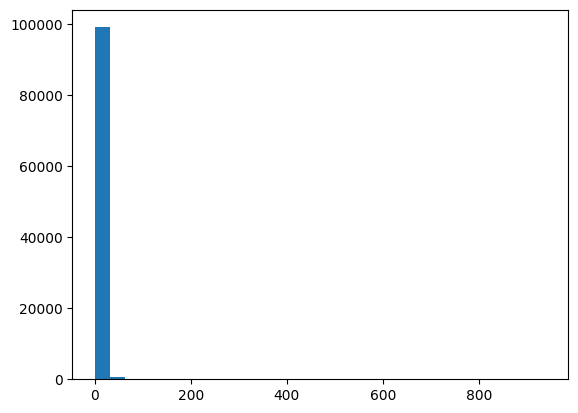

In [2]:
plt.hist(df_train.diameter, bins = 30);

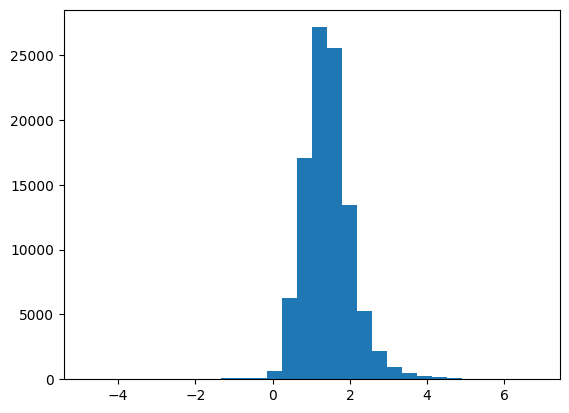

In [3]:
plt.hist(np.log(df_train.diameter), bins = 30);

In [4]:
df_train.diameter.describe()

count    100000.000000
mean          5.476452
std           9.536302
min           0.008000
25%           2.771000
50%           3.960000
75%           5.747000
max         939.400000
Name: diameter, dtype: float64

In [5]:
pd.Series(np.log(df_train.diameter)).describe()

count    100000.000000
mean          1.420759
std           0.641214
min          -4.828314
25%           1.019208
50%           1.376244
75%           1.748678
max           6.845241
Name: diameter, dtype: float64

> Posiblemente es una buena idea utilizar clipping o log!! 

## Features

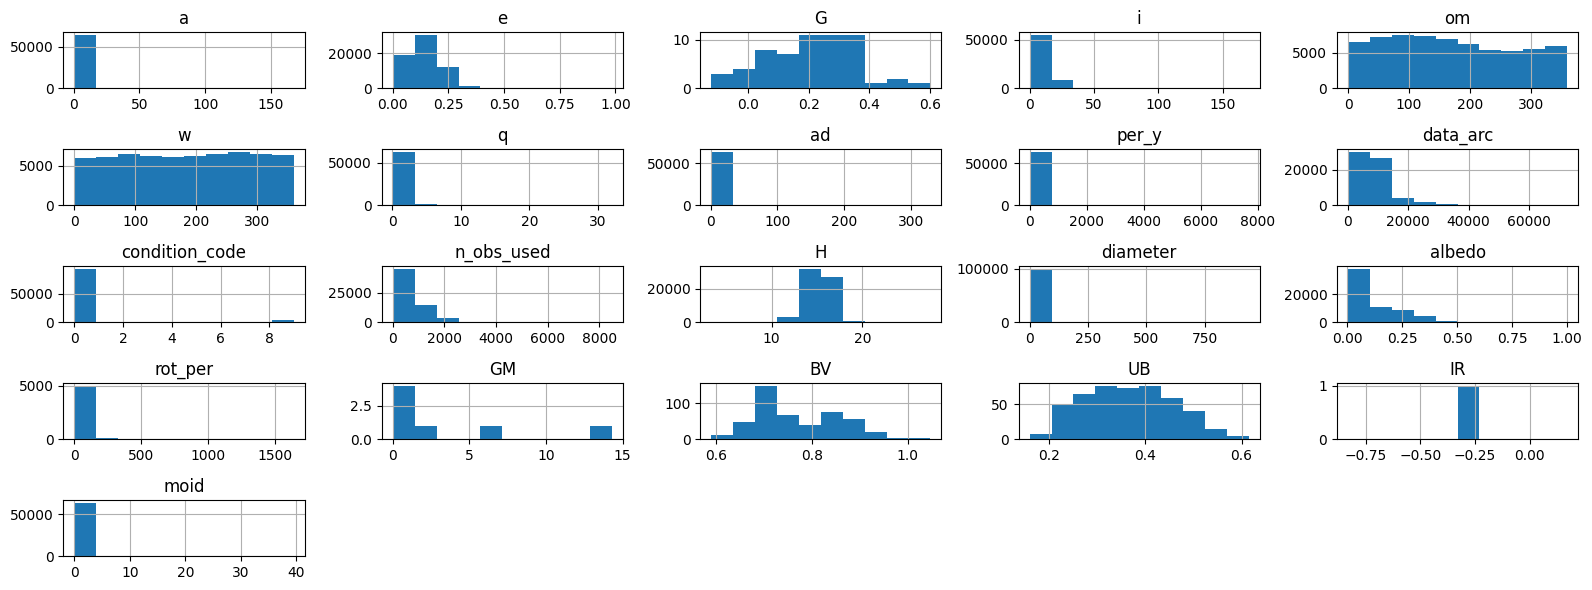

In [6]:
df_train.select_dtypes(np.number).hist(figsize=(16, 6))
plt.tight_layout();


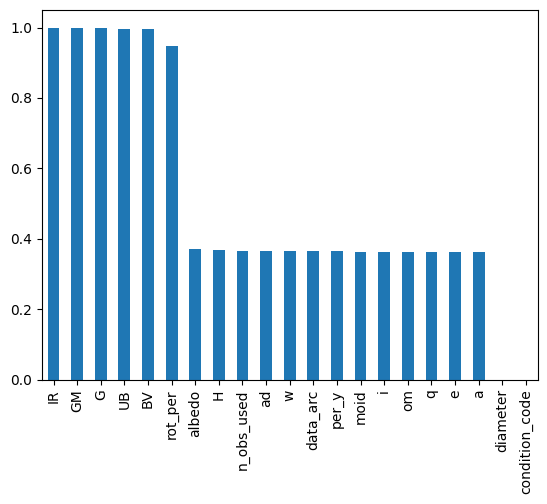

In [7]:
df_train.select_dtypes(np.number).isnull().mean().sort_values(ascending=False).plot(kind = "bar");

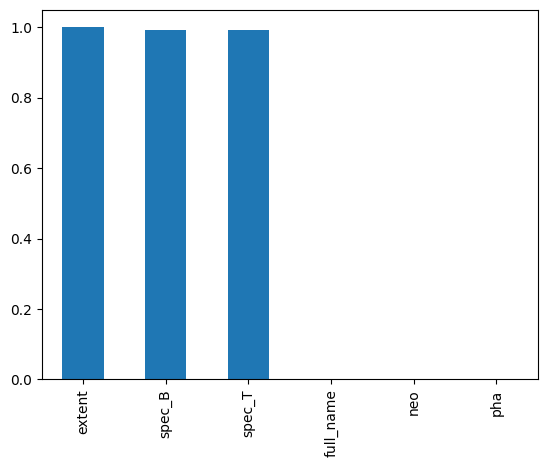

In [8]:
df_train.select_dtypes("object").isnull().mean().sort_values(ascending=False).plot(kind = "bar");

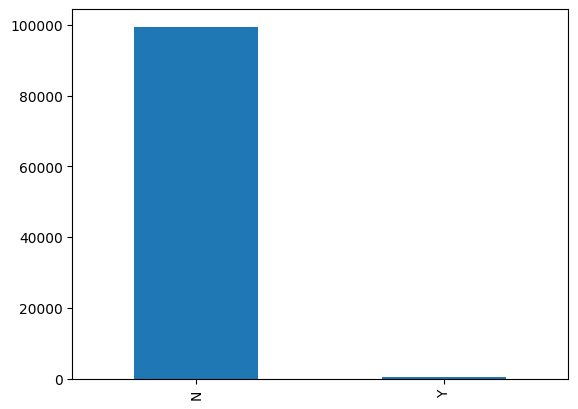

In [9]:
df_train.neo.value_counts().plot(kind = "bar");

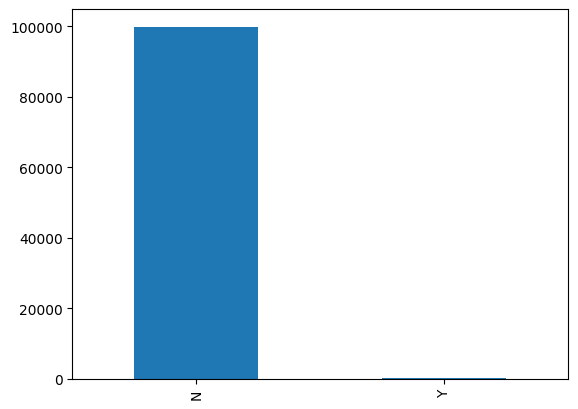

In [10]:
df_train.pha.value_counts().plot(kind = "bar");

In [11]:
df_train.full_name.nunique()

100000

## Valores Ausentes

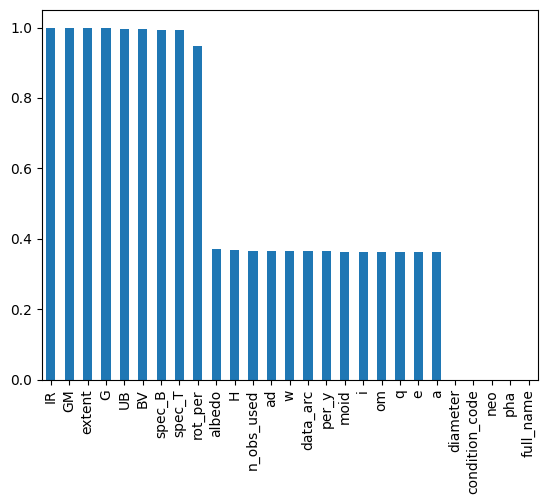

In [12]:
nulls = df_train.isnull().mean().sort_values(ascending=False)
nulls.plot(kind = "bar");

In [14]:
to_remove = nulls.loc[lambda x: x > 0.6].index.tolist()
to_remove

['IR', 'GM', 'extent', 'G', 'UB', 'BV', 'spec_B', 'spec_T', 'rot_per']

In [16]:

df_train.drop(columns = to_remove).corr()

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,diameter,albedo,moid
a,1.000000,-0.056278,0.198148,0.002750,-0.005453,0.507797,0.970148,0.913352,-0.028532,-0.048933,-0.072904,-0.288149,0.214047,-0.163815,0.487896
e,-0.056278,1.000000,0.148635,0.003936,0.009946,-0.513895,0.208528,0.053648,-0.024669,0.014104,-0.074730,0.192213,-0.048444,-0.023311,-0.479370
i,0.198148,0.148635,1.000000,-0.005745,-0.008885,0.079673,0.193270,0.110458,-0.206575,0.214992,-0.222990,-0.034802,0.053810,-0.088504,0.120018
om,0.002750,0.003936,-0.005745,1.000000,-0.110399,-0.001548,0.004001,-0.001674,0.006322,0.021040,-0.022798,0.000549,0.006179,-0.002570,-0.005860
w,-0.005453,0.009946,-0.008885,-0.110399,1.000000,-0.006456,-0.003088,0.000494,-0.005808,-0.000284,0.011818,-0.005311,0.003034,-0.000973,-0.012721
q,0.507797,-0.513895,0.079673,-0.001548,-0.006456,1.000000,0.281784,0.081784,-0.021277,-0.092674,-0.078196,-0.382174,0.303424,-0.257956,0.996636
ad,0.970148,0.208528,0.193270,0.004001,-0.003088,0.281784,1.000000,0.924721,-0.022021,-0.025323,-0.056808,-0.194477,0.179997,-0.102833,0.319223
per_y,0.913352,0.053648,0.110458,-0.001674,0.000494,0.081784,0.924721,1.000000,-0.008907,-0.001386,-0.007959,-0.031552,0.046439,-0.013841,0.081941
data_arc,-0.028532,-0.024669,-0.206575,0.006322,-0.005808,-0.021277,-0.022021,-0.008907,1.000000,-0.347135,0.754573,-0.670499,0.492093,0.251847,-0.023014
condition_code,-0.048933,0.014104,0.214992,0.021040,-0.000284,-0.092674,-0.025323,-0.001386,-0.347135,1.000000,-0.271404,0.265244,-0.072022,-0.128931,-0.086002


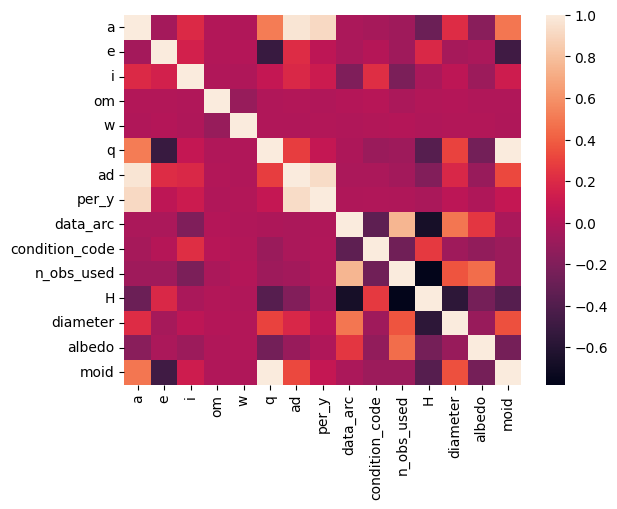

In [14]:
sns.heatmap(df_train.drop(columns = to_remove).corr());

In [15]:
df_train.drop(columns = to_remove).corrwith(df_train.diameter).sort_values(ascending=False)

diameter          1.000000
data_arc          0.492093
n_obs_used        0.361396
moid              0.349714
q                 0.303424
a                 0.214047
ad                0.179997
i                 0.053810
per_y             0.046439
om                0.006179
w                 0.003034
e                -0.048444
condition_code   -0.072022
albedo           -0.103393
H                -0.564493
dtype: float64

In [16]:
remove_corr = ["a", "per_y"]
remove_corr_2 = ["i","per_y","om","w","e","condition_code"]

In [17]:
df_train.diameter.describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    100000.000000
mean          5.476452
std           9.536302
min           0.008000
1%            1.251000
5%            1.700000
10%           2.023000
25%           2.771000
50%           3.960000
75%           5.747000
90%           8.608000
95%          12.059000
99%          31.358200
max         939.400000
Name: diameter, dtype: float64

In [18]:
pd.cut(df_train.diameter, 10).value_counts()

(-0.931, 93.947]      99800
(93.947, 187.886]       169
(187.886, 281.826]       24
(281.826, 375.765]        3
(845.461, 939.4]          2
(375.765, 469.704]        1
(469.704, 563.643]        1
(563.643, 657.582]        0
(657.582, 751.522]        0
(751.522, 845.461]        0
Name: diameter, dtype: int64

## Modelo Baseline

In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from feature_engine.imputation import MeanMedianImputer
from feature_engine.encoding import OneHotEncoder, OrdinalEncoder
from feature_engine.imputation import CategoricalImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.compose import TransformedTargetRegressor

In [20]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

X_train = df_train.drop(columns = to_remove+["full_name","diameter"])
X_test = df_test.drop(columns = to_remove+["full_name"])

y_train = df_train.diameter

print(X_train.shape, X_test.shape)

score = []
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train), start=1):
    print(f"Fold {fold}")
    X_train_fold = X_train.iloc[train_idx]
    y_train_fold = y_train.iloc[train_idx]
    X_val_fold = X_train.iloc[val_idx]
    y_val_fold = y_train.iloc[val_idx]
    
    pipe = Pipeline(steps=[
    ("cat_imp", CategoricalImputer(imputation_method="frequent")),
    ("num_imp", MeanMedianImputer(imputation_method="mean")),
    ("one_hot", OneHotEncoder()),
    ("scaler", StandardScaler()),
    # ("knn", TransformedTargetRegressor(KNeighborsRegressor(n_neighbors=5), func=np.log, inverse_func=np.exp))
    ("knn", KNeighborsRegressor(n_neighbors=5))
    ]
    )

    pipe.fit(X_train_fold, y_train_fold)
    y_pred = pipe.predict(X_val_fold)
    # y_pred = model.predict(X_val_fold)
    mse = mean_squared_error(y_pred, y_val_fold)
    print(f"MSE for fold {fold}: {mse}")
    score.append(mse)

np.mean(score)

(100000, 16) (37681, 16)
Fold 1
MSE for fold 1: 20.171484994853998
Fold 2
MSE for fold 2: 23.789751738009997
Fold 3
MSE for fold 3: 79.36121907721399
Fold 4
MSE for fold 4: 32.08829896388999
Fold 5
MSE for fold 5: 20.801151037593993


35.24238116231239

In [21]:
pipe = Pipeline(steps=[
("cat_imp", CategoricalImputer(imputation_method="frequent")),
("num_imp", MeanMedianImputer(imputation_method="mean")),
("one_hot", OneHotEncoder()),
("scaler", StandardScaler()),
# ("knn", TransformedTargetRegressor(KNeighborsRegressor(n_neighbors=5), func=np.log, inverse_func=np.exp))
("knn", KNeighborsRegressor(n_neighbors=5))
]
)

-cross_val_score(pipe, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=42), scoring="neg_mean_squared_error").mean()

35.24238116231239

In [22]:
X_train = df_train.drop(columns = to_remove+["full_name","diameter"]+remove_corr_2)
X_test = df_test.drop(columns = to_remove+["full_name"]+remove_corr_2)

y_train = df_train.diameter

pipe = Pipeline(steps=[
("cat_imp", CategoricalImputer(imputation_method="frequent")),
("num_imp", MeanMedianImputer(imputation_method="mean")),
("one_hot", OneHotEncoder()),
("scaler", StandardScaler()),
# ("knn", TransformedTargetRegressor(KNeighborsRegressor(n_neighbors=5), func=np.log, inverse_func=np.exp))
("knn", KNeighborsRegressor(n_neighbors=5))
]
)

-cross_val_score(pipe, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=42), scoring="neg_mean_squared_error").mean()



33.7098232306868

In [24]:
X_train = df_train.drop(columns = to_remove+["full_name","diameter"]+remove_corr_2)
X_test = df_test.drop(columns = to_remove+["full_name"]+remove_corr_2)
y_train = df_train.diameter

idx = y_train > 90

X_train = X_train.loc[~idx]
y_train = y_train.loc[~idx]

X_train.shape, y_train.shape

pipe = Pipeline(steps=[
("cat_imp", CategoricalImputer(imputation_method="frequent")),
("num_imp", MeanMedianImputer(imputation_method="mean")),
("one_hot", OneHotEncoder()),
("scaler", StandardScaler()),
# ("knn", TransformedTargetRegressor(KNeighborsRegressor(n_neighbors=5), func=np.log, inverse_func=np.exp))
("knn", KNeighborsRegressor(n_neighbors=5))
]
)

-cross_val_score(pipe, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=42), scoring="neg_mean_squared_error").mean()


7.907530116454119

In [26]:


X_train

,a,q,ad,data_arc,n_obs_used,H,albedo,neo,pha,moid
index,,,,,,,,,,
16,2.470354,2.141719,2.798989,61117.0,NaN,7.76,0.1930,N,N,1.129810
31,NaN,2.379094,NaN,NaN,2133.0,7.56,0.2564,N,N,1.377040
32,2.873456,1.921347,NaN,59639.0,NaN,8.55,NaN,N,N,0.913808
42,2.203475,1.832582,NaN,56486.0,2495.0,7.93,NaN,N,N,0.815860
49,2.648794,1.891277,3.406311,59008.0,2896.0,9.24,NaN,N,N,NaN
...,...,...,...,...,...,...,...,...,...,...
797841,3.158981,2.162046,4.155917,6294.0,95.0,NaN,NaN,N,N,1.280800
797871,3.155975,NaN,NaN,2250.0,47.0,18.20,0.1160,N,N,0.854315
797896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,1.663010


In [50]:
X_train = df_train.drop(columns = to_remove+["full_name","diameter"]+remove_corr)
X_test = df_test.drop(columns = to_remove+["full_name"]+remove_corr)
y_train = df_train.diameter

idx = y_train > 90

X_train = X_train.loc[~idx]
y_train = y_train.loc[~idx]

X_train.shape, y_train.shape

pipe = Pipeline(steps=[
("cat_imp", CategoricalImputer(imputation_method="frequent")),
("num_imp", MeanMedianImputer(imputation_method="mean")),
("one_hot", OneHotEncoder()),
("scaler", StandardScaler()),
# ("knn", TransformedTargetRegressor(KNeighborsRegressor(n_neighbors=5), func=np.log, inverse_func=np.exp))
("knn", KNeighborsRegressor(n_neighbors=5))
]
)

-cross_val_score(pipe, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=42), scoring="neg_mean_squared_error").mean()


8.847558791285422